In [150]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import csv
import numpy as np
import torch.utils.data as D

In [151]:
x = []
y = []

In [152]:
InputFile = open("input_test.csv","r")
InputReader = csv.reader(InputFile)
for item in InputReader:
    # print(item)
    item = [float(i) for i in item]
    # print(item)
    # print(item[1:-1])
    x.append(item)
print(x)
# 14列

[[0.043508, 0.050954, 0.064438, 0.065991, 0.050753, 0.051196, 0.051985, 0.046067, 0.054684, 0.04829, 0.051072, 0.046212, 0.042117, 0.041663, 0.042349, 0.038978, 0.043089, 0.03917, 0.034528, 0.035462, 0.01186], [0.044978, 0.056319, 0.065991, 0.058798, 0.051396, 0.054264, 0.054225, 0.045682, 0.051995, 0.048712, 0.045378, 0.049204, 0.045302, 0.046044, 0.04644, 0.043738, 0.043536, 0.04066, 0.035681, 0.037239, 0.016901], [0.017039, 0.018894, 0.023405, 0.021011, 0.020163, 0.018972, 0.019288, 0.016503, 0.019206, 0.017334, 0.018243, 0.016372, 0.016655, 0.015848, 0.016243, 0.015166, 0.014506, 0.01453, 0.012861, 0.013187, 0.007079], [0.020742, 0.017918, 0.02529, 0.024276, 0.021112, 0.021402, 0.020583, 0.018086, 0.019996, 0.018498, 0.019095, 0.01893, 0.016793, 0.016983, 0.018495, 0.01598, 0.016525, 0.015617, 0.013965, 0.01412, 0.006442], [0.019536, 0.019695, 0.023067, 0.021062, 0.019929, 0.020611, 0.021446, 0.019779, 0.019601, 0.018028, 0.019197, 0.018264, 0.016998, 0.016838, 0.017487, 0.01617, 0

In [153]:

OutputFile = open("output_test.csv","r")
OutputReader = csv.reader(OutputFile)
for item in OutputReader:
    # print(item)
    item = [float(i) for i in item]
    y.append(item)
print(y)
# 8列

[[41.5, 7.58, 13.21, 15.83, 7.82, 12.05, 0.44, 0.14], [41.9, 7.56, 13.55, 15.94, 7.82, 12.08, 0.4, 0.13], [46.2, 2.67, 12.56, 16.85, 9.8, 8.54, 0.43, 0.25], [46.6, 2.81, 11.9, 16.32, 10.25, 10.35, 0.5, 0.23], [46.58, 2.56, 13.59, 15.11, 9.89, 10.53, 0.56, 0.363], [46.7, 3.6, 14.6, 14.2, 9.5, 10.6, 0.43, 0.24], [48.08, 1.77, 17.59, 10.45, 9.27, 11.12, 0.65, 0.54], [47.8, 1.66, 16.2, 10.2, 10.7, 10.3, 0.81, 0.62], [47.8, 1.67, 17.99, 10.02, 9.47, 11.25, 0.7, 0.54], [47.5, 1.42, 17.4, 10.3, 9.28, 10.8, 0.63, 0.48], [46.77, 1.46, 16.75, 12.4, 10.35, 10.95, 0.45, 0.21], [46.56, 1.75, 13.73, 15.21, 10.37, 10.54, 0.41, 0.2], [46.95, 1.6, 12.7, 16.29, 10.75, 10.49, 0.33, 0.092], [46.47, 1.31, 17.47, 11.57, 10.5, 11.77, 0.41, 0.18], [45.95, 1.27, 17.38, 11.65, 10.36, 11.52, 0.39, 0.17], [44.8, 0.44, 28.5, 4.5, 5.05, 16.2, 0.46, 0.14], [45.22, 0.59, 26.84, 5.51, 5.52, 15.32, 0.4, 0.114], [45.2, 0.58, 26.4, 5.29, 6.1, 15.32, 0.52, 0.14], [44.6, 0.66, 27.1, 5.47, 5.78, 15.56, 0.51, 0.25], [44.65, 

In [154]:
x = np.array(x)
y = np.array(y)

In [155]:
print(x.shape)
print(y.shape)

(25, 21)
(25, 8)


In [156]:
# x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)

# x = torch.FloatTensor([[1.3],[2.1]])
# y = x.pow(2) + 0.2*torch.rand(x.size())

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
# y = x.pow(2) + 0.2*torch.rand(x.size())

x,y = Variable(x), Variable(y)
# x = Variable(x)

print(x)
print(y)

tensor([[0.0435, 0.0510, 0.0644, 0.0660, 0.0508, 0.0512, 0.0520, 0.0461, 0.0547,
         0.0483, 0.0511, 0.0462, 0.0421, 0.0417, 0.0423, 0.0390, 0.0431, 0.0392,
         0.0345, 0.0355, 0.0119],
        [0.0450, 0.0563, 0.0660, 0.0588, 0.0514, 0.0543, 0.0542, 0.0457, 0.0520,
         0.0487, 0.0454, 0.0492, 0.0453, 0.0460, 0.0464, 0.0437, 0.0435, 0.0407,
         0.0357, 0.0372, 0.0169],
        [0.0170, 0.0189, 0.0234, 0.0210, 0.0202, 0.0190, 0.0193, 0.0165, 0.0192,
         0.0173, 0.0182, 0.0164, 0.0167, 0.0158, 0.0162, 0.0152, 0.0145, 0.0145,
         0.0129, 0.0132, 0.0071],
        [0.0207, 0.0179, 0.0253, 0.0243, 0.0211, 0.0214, 0.0206, 0.0181, 0.0200,
         0.0185, 0.0191, 0.0189, 0.0168, 0.0170, 0.0185, 0.0160, 0.0165, 0.0156,
         0.0140, 0.0141, 0.0064],
        [0.0195, 0.0197, 0.0231, 0.0211, 0.0199, 0.0206, 0.0214, 0.0198, 0.0196,
         0.0180, 0.0192, 0.0183, 0.0170, 0.0168, 0.0175, 0.0162, 0.0162, 0.0151,
         0.0136, 0.0137, 0.0068],
        [0.0208, 0.0

In [157]:
# plt.scatter(x.data.numpy(),y.data.numpy())
# plt.show()

In [158]:
class Net(torch.nn.Module):
   def __init__(self, n_feature, n_hidden, n_output):
       super(Net, self).__init__()
       self.hidden = torch.nn.Linear(n_feature,n_hidden)
       self.predict = torch.nn.Linear(n_hidden,n_output)
   
   def forward(self, x):
       x = F.relu(self.hidden(x))
       x = self.predict(x)
       return x

In [159]:
net = Net(21, 20, 8)
print(net)


Net(
  (hidden): Linear(in_features=21, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=8, bias=True)
)


In [160]:
# plt.ion()
# plt.show()

In [161]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.0002, weight_decay=0.02)
loss_func = nn.MSELoss()

In [162]:
BATCH_SIZE = 25
TRAIN_TIMES = 2000

In [163]:
losslist = []
timelist = []

In [164]:
torch_dataset = D.TensorDataset(x, y)

loader = D.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

for epoch in range(TRAIN_TIMES):
    for step, (batch_x, batch_y) in enumerate(loader):
        
        prediction = net(batch_x)
        loss = loss_func(prediction, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # for test
        if epoch%200 == 0:
            print(loss.data.numpy())

        losslist.append(loss.data.numpy())
        timelist.append(step + epoch * (TRAIN_TIMES * 25 / BATCH_SIZE))

349.57462
340.49933
329.2932
311.03302
276.01514
211.0002
120.56745
47.527958
16.93179
9.484361


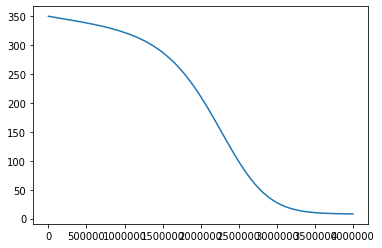

In [165]:
plt.plot(timelist, losslist)

In [166]:
torch.save(net.state_dict(), './model-version-1-args.model')

In [167]:
print((net(x)).detach().numpy())
print(y.numpy())

[[44.29257     3.0268168  17.08555    11.752694    8.719336   11.674811
   0.48845807  0.19957392]
 [44.312275    3.0287776  17.092789   11.758225    8.723391   11.680068
   0.4873697   0.19970922]
 [43.613197    2.9779627  16.827276   11.576305    8.578167   11.494992
   0.47676435  0.1978168 ]
 [43.64103     2.9799318  16.837639   11.583319    8.583866   11.502173
   0.477878    0.19777672]
 [43.630196    2.9792817  16.833538   11.580906    8.58153    11.49919
   0.47697762  0.19815286]
 [43.65709     2.9809253  16.843904   11.587506    8.587636   11.506799
   0.47747007  0.19783   ]
 [43.76392     2.9884152  16.883884   11.615786    8.609264   11.53439
   0.47926918  0.19918661]
 [43.78111     2.9898274  16.890562   11.619694    8.613291   11.53935
   0.48005775  0.19860496]
 [43.72052     2.9860094  16.867863   11.604294    8.600246   11.523279
   0.47863922  0.19817643]
 [43.675076    2.9824433  16.850641   11.59256     8.590635   11.51123
   0.47777072  0.19804586]
 [43.894466   

In [168]:
# optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
# loss_func = torch.nn.MSELoss()

# for t in range(100):
#     prediction = net(x)

#     loss = loss_func(prediction, y)

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     if t % 5 == 0:
#         plt.cla()
#         plt.scatter(x.data.numpy(),y.data.numpy())
#         plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
#         plt.text(0.5,0,'Loss=%.4f'%loss.data,fontdict={'size':20,'color':'red'})
#         plt.pause(0.1)

# plt.ioff()
# plt.show()
